# Analysis and plotting of RBD depletions for sera samples

### Set up Analysis

Import packages.

In [1]:
import itertools
import math
import os
import re
import warnings

from IPython.display import display, HTML

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
import matplotlib.pyplot as plt
from mizani.formatters import scientific_format
import natsort

from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import numpy as np
import pandas as pd
from plotnine import *

import yaml
plt.rcParams['svg.fonttype'] = 'none'


In [2]:
warnings.simplefilter('ignore')

Read config file.

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

Use seaborn theme and change font:

In [4]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

## ELISA for RBD binding

In [5]:
elisa_pv_df_1 = pd.read_csv(config['RBD_depletion'])

elisa_pv_df_1 = (pd.melt(elisa_pv_df_1, 
                        id_vars=[ 'serum', 'depleted', 'round', 'ligand', 'plate', 'group'], 
                        var_name='dilution_factor', 
                        value_name='OD450'
                       )
                .assign(dilution_factor=lambda x: x['dilution_factor'].astype(int))
               )

elisa_pv_df_1 = (elisa_pv_df_1
                .assign(depleted= pd.Categorical(elisa_pv_df_1['depleted'], categories=['pre', 'post'], ordered=True),
                        dilution=lambda x: 1/x['dilution_factor'],
               )
                .sort_values('serum', key=lambda x: np.argsort(natsort.index_natsorted(x)))
       )

In [6]:
frames = [elisa_pv_df_1]
elisa_pv_df = pd.concat(frames)

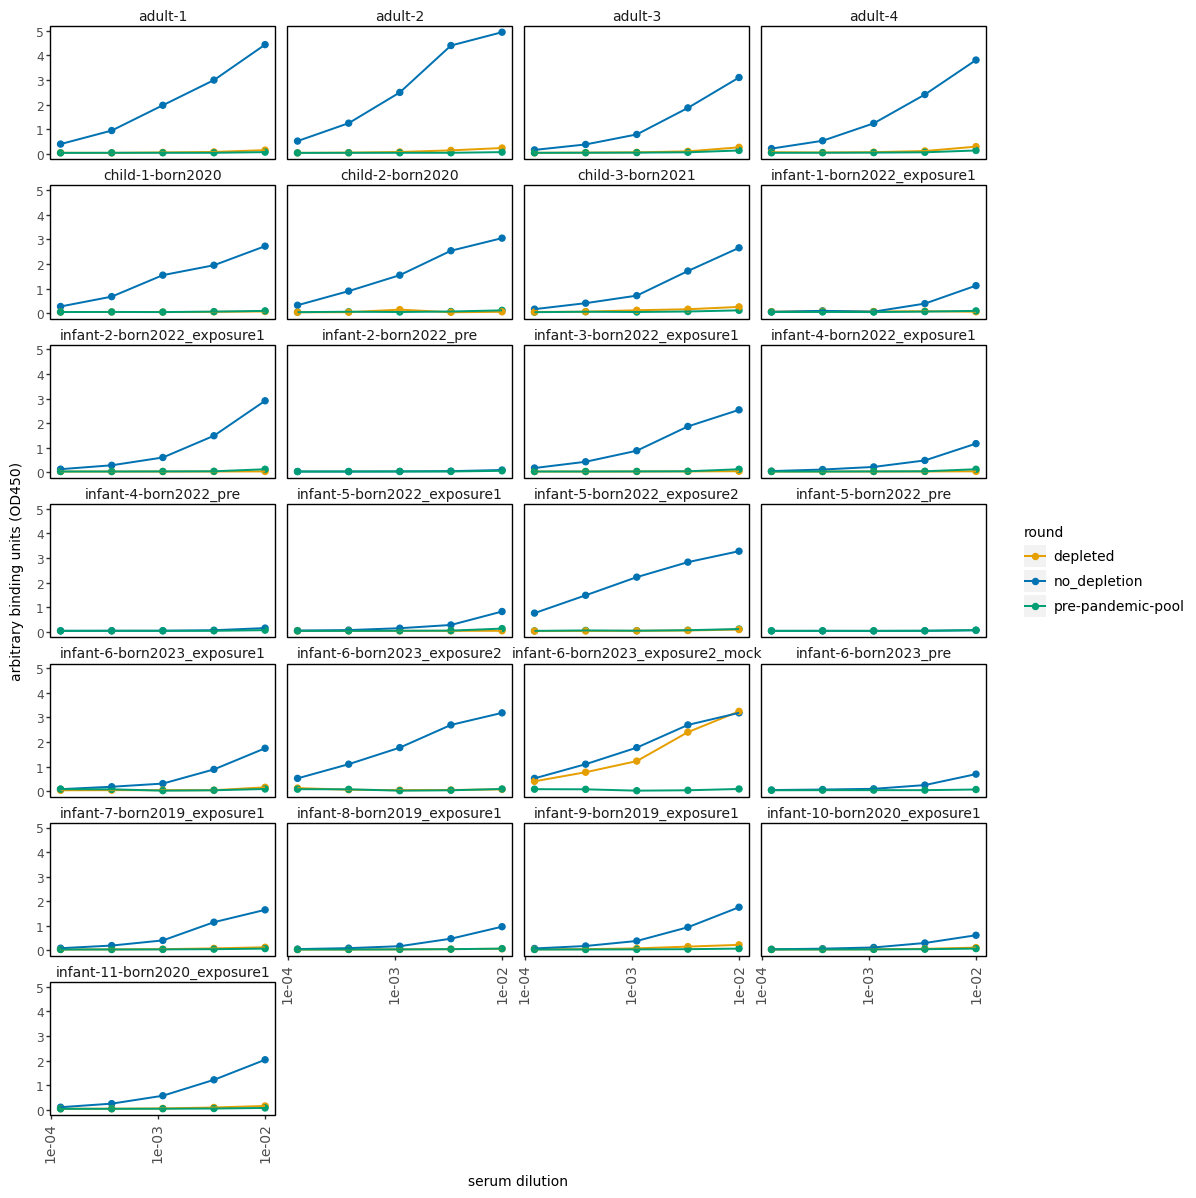

In [7]:
#plot all binding curves
nconditions = elisa_pv_df['serum'].nunique()
ncol = np.minimum(6, nconditions)
nrow = math.ceil(nconditions / ncol)

colours = ('#E69F00','#0072B2','#009E73','#F0E442','#56B4E9',)

depletion = (
    ggplot((elisa_pv_df
            .assign(serum=lambda x: pd.Categorical(x['serum'], 
                                                   natsort.natsorted(x['serum'].unique()), 
                                                   ordered=True))
           ),
           aes('dilution', 
               'OD450', 
               color='round'
              )) +
    geom_point(size=2) +
    geom_path(aes(color='round'), size=.8) +
    scale_x_log10(name='serum dilution', labels=scientific_format(digits=0)) +
    facet_wrap('~ serum', ncol=4) +
    theme(figure_size=(12,12),
          axis_text_x=element_text(size=10,angle=90),
          subplots_adjust={'hspace':0.35},
          strip_background_x=element_blank(),
          strip_text_x=element_text(size=10),
          legend_text=element_text(size=10),
          legend_title=element_text(size=10),
          axis_title_x=element_text(size=10),
          axis_title_y=element_text(size=10),
          panel_background=element_rect(fill='white'),
          plot_background=element_rect(fill='white'),
          panel_border=element_line(size=1)
         ) +
    scale_color_manual(values=colours) +
    scale_shape_manual(values=['o', 'x']) +
    ylab('arbitrary binding units (OD450)')
    )
depletion.draw()


Below just plots binding curves by experimental sera set

In [8]:
elisa_pv_df_adult = elisa_pv_df.loc[elisa_pv_df['group'] == 'adult']
elisa_pv_df_child = elisa_pv_df.loc[elisa_pv_df['group'] == 'child']
elisa_pv_df_infant_XBB = elisa_pv_df.loc[
    (elisa_pv_df['group'] == 'infant') & 
    (elisa_pv_df['ligand'] == 'XBB15-RBD')
]
elisa_pv_df_infant_wu1 = elisa_pv_df.loc[
    (elisa_pv_df['group'] == 'infant') & 
    (elisa_pv_df['ligand'] == 'Wuhan-Hu-1-RBD')
]
elisa_pv_df_infantpre = elisa_pv_df.loc[elisa_pv_df['group'] == 'infant-pre']

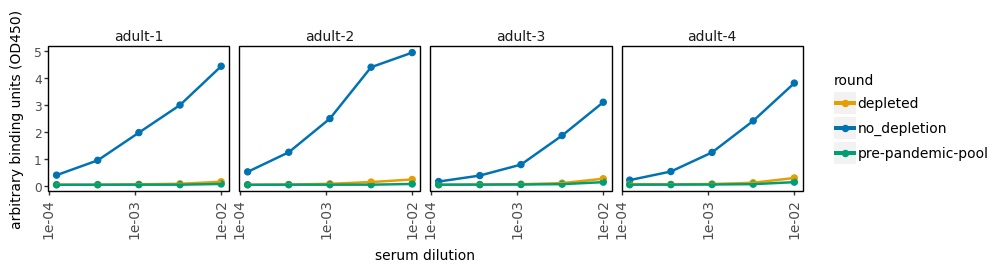

In [9]:
adult_depletion = (
    ggplot((elisa_pv_df_adult
            .assign(serum=lambda x: pd.Categorical(x['serum'], 
                                                   natsort.natsorted(x['serum'].unique()), 
                                                   ordered=True))
           ),
           aes('dilution', 
               'OD450', 
               color='round'
              )) +
    geom_point(size=2) +
    geom_path(aes(color='round'), size=1) +
    scale_x_log10(name='serum dilution', labels=scientific_format(digits=0)) +
    facet_wrap('~ serum', ncol=4) +
    theme(figure_size=(10,2.5),
          axis_text_x=element_text(size=10,angle=90),
          subplots_adjust={'hspace':0.35},
          strip_background_x=element_blank(),
          strip_text_x=element_text(size=10),
          legend_text=element_text(size=10),
          legend_title=element_text(size=10),
          axis_title_x=element_text(size=10),
          axis_title_y=element_text(size=10),
          panel_background=element_rect(fill='white'),
          plot_background=element_rect(fill='white'),
          panel_border=element_line(size=1)
         ) +
    scale_color_manual(values=colours) +
    scale_shape_manual(values=['o', 'x']) +
    ylab('arbitrary binding units (OD450)')
    )

adult_depletion.save("results/depletion_adult_ELISA.svg", format="svg")
adult_depletion.save("results/depletion_adult_ELISA.png", format="png", dpi=300)
adult_depletion.draw()


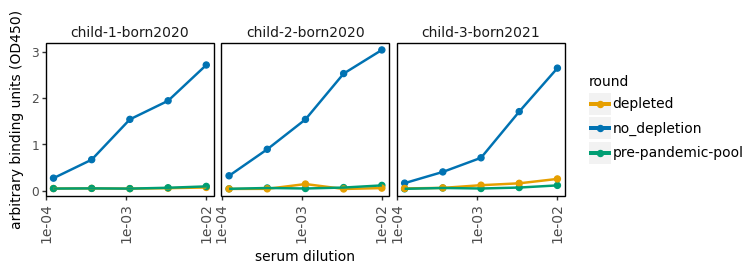

In [10]:
child_depletion = (
    ggplot((elisa_pv_df_child
            .assign(serum=lambda x: pd.Categorical(x['serum'], 
                                                   natsort.natsorted(x['serum'].unique()), 
                                                   ordered=True))
           ),
           aes('dilution', 
               'OD450', 
               color='round'
              )) +
    geom_point(size=2) +
    geom_path(aes(color='round'), size=1) +
    scale_x_log10(name='serum dilution', labels=scientific_format(digits=0)) +
    facet_wrap('~ serum', ncol=3) +
    theme(figure_size=(7.5,2.5),
          axis_text_x=element_text(size=10,angle=90),
          subplots_adjust={'hspace':0.35},
          strip_background_x=element_blank(),
          strip_text_x=element_text(size=10),
          legend_text=element_text(size=10),
          legend_title=element_text(size=10),
          axis_title_x=element_text(size=10),
          axis_title_y=element_text(size=10),
          panel_background=element_rect(fill='white'),
          plot_background=element_rect(fill='white'),
          panel_border=element_line(size=1)
         ) +
    scale_color_manual(values=colours) +
    scale_shape_manual(values=['o', 'x']) +
    ylab('arbitrary binding units (OD450)')
    )

child_depletion.save("results/depletion_child_ELISA.svg", format="svg")
child_depletion.save("results/depletion_child_ELISA.png", format="png", dpi=300)
child_depletion.draw()


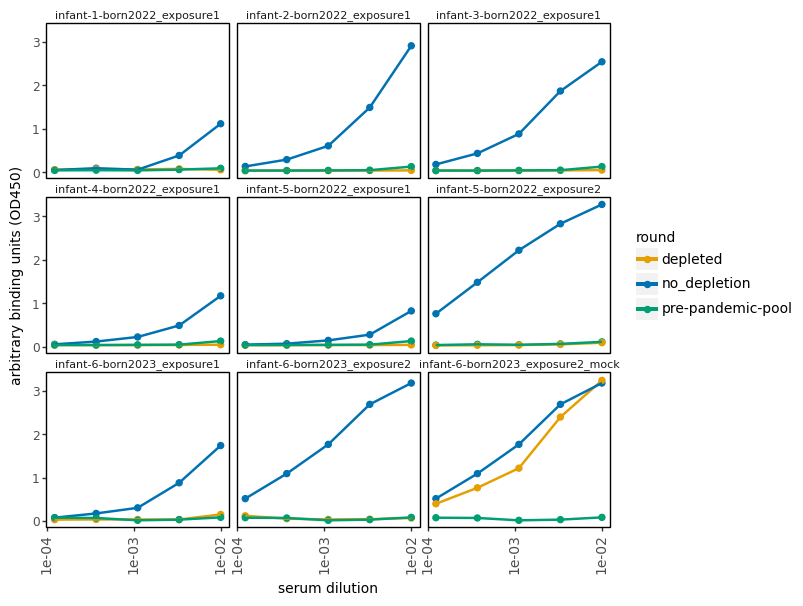

In [11]:
infant_depletion_XBB = (
    ggplot((elisa_pv_df_infant_XBB
            .assign(serum=lambda x: pd.Categorical(x['serum'], 
                                                   natsort.natsorted(x['serum'].unique()), 
                                                   ordered=True))
           ),
           aes('dilution', 
               'OD450', 
               color='round'
              )) +
    geom_point(size=2) +
    geom_path(aes(color='round'), size=1) +
    scale_x_log10(name='serum dilution', labels=scientific_format(digits=0)) +
    facet_wrap('~ serum', ncol=3) +
    theme(figure_size=(8,6),
          axis_text_x=element_text(size=10,angle=90),
          subplots_adjust={'hspace':0.35},
          strip_background_x=element_blank(),
          strip_text_x=element_text(size=8),
          legend_text=element_text(size=10),
          legend_title=element_text(size=10),
          axis_title_x=element_text(size=10),
          axis_title_y=element_text(size=10),
          panel_background=element_rect(fill='white'),
          plot_background=element_rect(fill='white'),
          panel_border=element_line(size=1)
         ) +
    scale_color_manual(values=colours) +
    scale_shape_manual(values=['o', 'x']) +
    ylab('arbitrary binding units (OD450)')
    )

infant_depletion_XBB.save("results/depletion_infant_XBB_ELISA.svg", format="svg")
infant_depletion_XBB.save("results/depletion_infant_XBB_ELISA.png", format="png", dpi=300)
infant_depletion_XBB.draw()


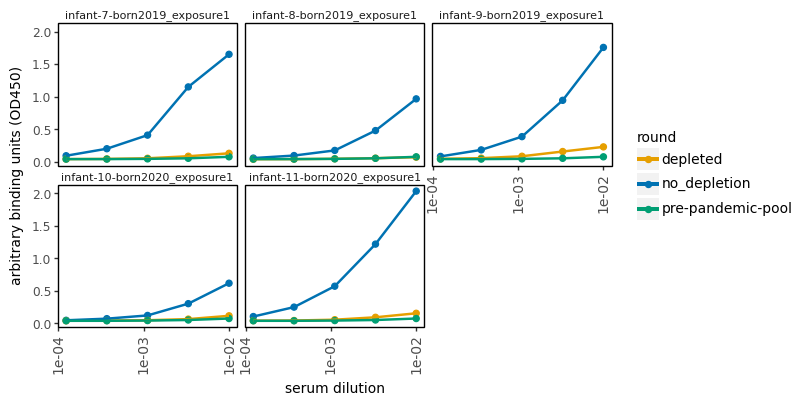

In [12]:
infant_depletion_wu1 = (
    ggplot((elisa_pv_df_infant_wu1
            .assign(serum=lambda x: pd.Categorical(x['serum'], 
                                                   natsort.natsorted(x['serum'].unique()), 
                                                   ordered=True))
           ),
           aes('dilution', 
               'OD450', 
               color='round'
              )) +
    geom_point(size=2) +
    geom_path(aes(color='round'), size=1) +
    scale_x_log10(name='serum dilution', labels=scientific_format(digits=0)) +
    facet_wrap('~ serum', ncol=3) +
    theme(figure_size=(8,4),
          axis_text_x=element_text(size=10,angle=90),
          subplots_adjust={'hspace':0.4},
          strip_background_x=element_blank(),
          strip_text_x=element_text(size=8),
          legend_text=element_text(size=10),
          legend_title=element_text(size=10),
          axis_title_x=element_text(size=10),
          axis_title_y=element_text(size=10),
          panel_background=element_rect(fill='white'),
          plot_background=element_rect(fill='white'),
          panel_border=element_line(size=1)
         ) +
    scale_color_manual(values=colours) +
    scale_shape_manual(values=['o', 'x']) +
    ylab('arbitrary binding units (OD450)')
    )

infant_depletion_wu1.save("results/depletion_infant_wu1_ELISA.svg", format="svg")
infant_depletion_wu1.save("results/depletion_infant_wu1_ELISA.png", format="png", dpi=300)
infant_depletion_wu1.draw()

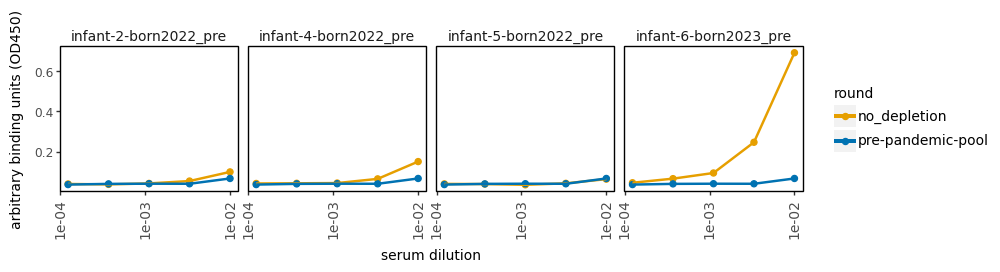

In [13]:
pre_depletion = (
    ggplot((elisa_pv_df_infantpre
            .assign(serum=lambda x: pd.Categorical(x['serum'], 
                                                   natsort.natsorted(x['serum'].unique()), 
                                                   ordered=True))
           ),
           aes('dilution', 
               'OD450', 
               color='round'
              )) +
    geom_point(size=2) +
    geom_path(aes(color='round'), size=1) +
    scale_x_log10(name='serum dilution', labels=scientific_format(digits=0)) +
    facet_wrap('~ serum', ncol=4) +
    theme(figure_size=(10,2.5),
          axis_text_x=element_text(size=10,angle=90),
          subplots_adjust={'hspace':0.35},
          strip_background_x=element_blank(),
          strip_text_x=element_text(size=10),
          legend_text=element_text(size=10),
          legend_title=element_text(size=10),
          axis_title_x=element_text(size=10),
          axis_title_y=element_text(size=10),
          panel_background=element_rect(fill='white'),
          plot_background=element_rect(fill='white'),
          panel_border=element_line(size=1)
         ) +
    scale_color_manual(values=colours) +
    scale_shape_manual(values=['o', 'x']) +
    ylab('arbitrary binding units (OD450)')
    )

pre_depletion.save("results/depletion_infantpreInfection_ELISA.svg", format="svg")
pre_depletion.save("results/depletion_infantpreInfection_ELISA.png", format="png", dpi=300)
pre_depletion.draw()
